# Predicting Food App Delivery Times

## Introduction:

### Problem Statement:


Food delivery is not a new function of society, however, like many of the conevniences we are privy to in the modern age it has been further distilled into a tool which seeks to further optimize the experience via the relatively recent boom of technological innovation which has characterized the 21st century. In order to help employees, customers, and vendors alike, I intend to create a predictive model to predict delivery times based on environmental variables. Internal stakegolders of food delivery apps can use this model to develop realistic expectations for their contract employees based on the circumstances at the time of delivery. Customers will not only have greater satisfaction due to the accurate estimations of when their food will arrive, but also greater utility by enabling customers to plan their lives around when their food will arrive. By centralizing the model's predictions both internal and external stakeholders will derive happier experiences overall.

### Data Set Description:

The dataset used for this predictive model is sourced from kaggle and is encoded in csv format. It contains order data for restaurants that use delivery apps. Due to the presence of one meaningless column and several empty cells, the data will require some cleaning and munging. Metrics like time of day, weather, and traffic level use relatively vague values which are either too broad or opinion based this could result in opinions being introduced into the data. However, because the predictions do not necessitate being hyper accurate, I believe the model will still provide a prediction with a relatively small margin of error.

This dataset contains 1000 records on orders completed for food delivery apps. It includes data on the distance of the delivery, weather, traffic level, time of day, vehicle type, preparation time, years of experience of the courier which can be used to predict the delivery time.

### Data Pre-Processing & Preliminary Examination

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
food_delivery_data = 'Food_Delivery_Times.csv'
df = pd.read_csv(food_delivery_data)
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [6]:
df = df.dropna()
df = df.drop(columns = 'Order_ID', axis = 1)
df = df[(df != 0).all(axis=1)]
# Cleaned data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             800 non-null    float64
 1   Weather                 800 non-null    object 
 2   Traffic_Level           800 non-null    object 
 3   Time_of_Day             800 non-null    object 
 4   Vehicle_Type            800 non-null    object 
 5   Preparation_Time_min    800 non-null    int64  
 6   Courier_Experience_yrs  800 non-null    float64
 7   Delivery_Time_min       800 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 56.2+ KB


In [7]:
float(df['Distance_km'].min())

0.6

In [8]:
float(df['Distance_km'].max())

19.99

In [9]:
float(df['Preparation_Time_min'].min())

5.0

In [10]:
float(df['Preparation_Time_min'].max())

29.0

In [11]:
float(df['Courier_Experience_yrs'].min())

1.0

In [12]:
float(df['Courier_Experience_yrs'].max())

9.0

After cleaning the data it will contain 800 orders. These orders were delivered within a distance that ranges from 0.6 to 19.99 kilometers. The preparation time of the orders ranges from 5 minutes to 29 minutes. The years of experience of the courier ranges from 1 to 9 years. The delivery time of these orders ranged from 8 to 141 minutes long.

## Exploratory Data Analysis

In [13]:
df.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,19.03,Clear,Low,Morning,Bike,16,5.0,68


### Descriptive Statistics

In [14]:
float(df['Delivery_Time_min'].median())

54.0

In [15]:
float(df['Delivery_Time_min'].mean())

56.02

In [16]:
float(df['Delivery_Time_min'].min())

8.0

In [17]:
float(df['Delivery_Time_min'].max())

141.0

Text(0.5, 1.0, 'Boxplot of Devlivery Times (Min)')

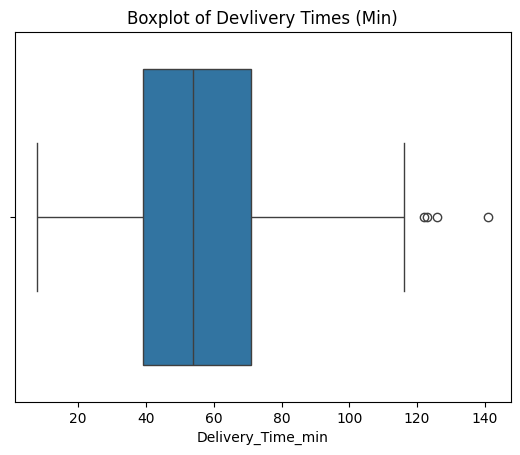

In [18]:
sns.boxplot(data = df, x = 'Delivery_Time_min')
plt.title('Boxplot of Devlivery Times (Min)')

Text(0.5, 1.0, 'Distribution of Devlivery Times (Min)')

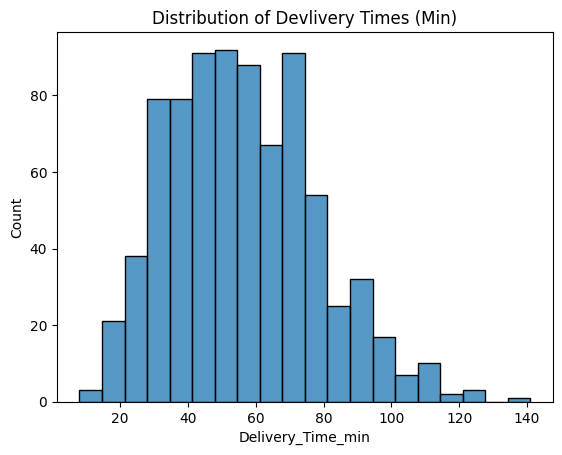

In [19]:
sns.histplot(data = df, x = 'Delivery_Time_min')
plt.title('Distribution of Devlivery Times (Min)')

As we can see the data is roughly normal with a slight weight towards faster delivery times. The center is around 50-60 minutes. The times range from a minimum of 8 to a maxium of 141 minutes.

### Initial Visualizations

Text(0.5, 1.0, 'Distance (km) vs Delivery Time (Min)')

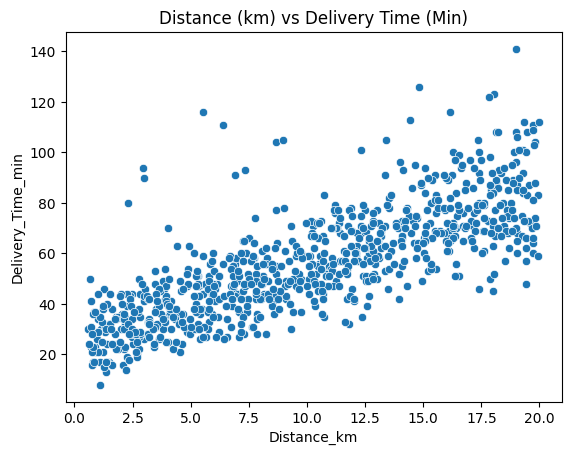

In [20]:
# Distance against Delivery Time
sns.scatterplot(data=df, x='Distance_km', y='Delivery_Time_min')
plt.title('Distance (km) vs Delivery Time (Min)')

This scatterplot showcases a direct linear correlation between distance of the delivery and delivery time. This correlation confirms what one might anticipate with respect to delivery time. Presumably, as the distance increases, the time to deliver would similarly increase. Despite this, there are some anomalies which could indicate that other environmental factors play a role.

Text(0.5, 1.0, 'Weather conditions vs Delivery Time (Min)')

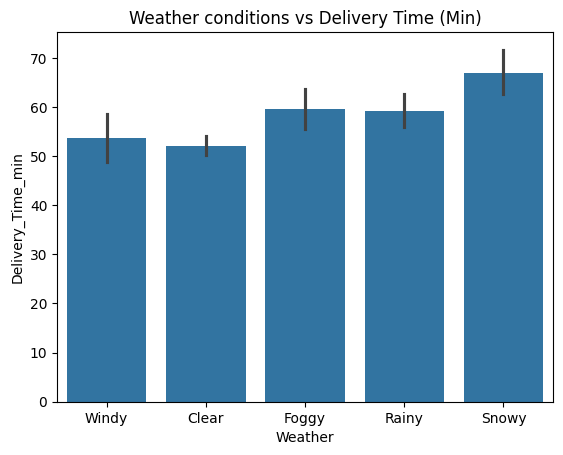

In [21]:
# Weather against Delivery Time
sns.barplot(data=df, x='Weather', y='Delivery_Time_min')
plt.title('Weather conditions vs Delivery Time (Min)')

This barplot demonstrates slight variations in delivery time based on weather patterns. Generally, it appears that on average delivery times are the shortest in clear weather and increase in non-clear weather patterns. With windy weather having only a slight increase in delivery times with respect to clear weather and snowy weather having the largest increase. Foggy and rainy weather patterns lie in the middle of the pack but are almost virtually the same.

Text(0.5, 1.0, 'Traffic Level vs Delivery Time (Min)')

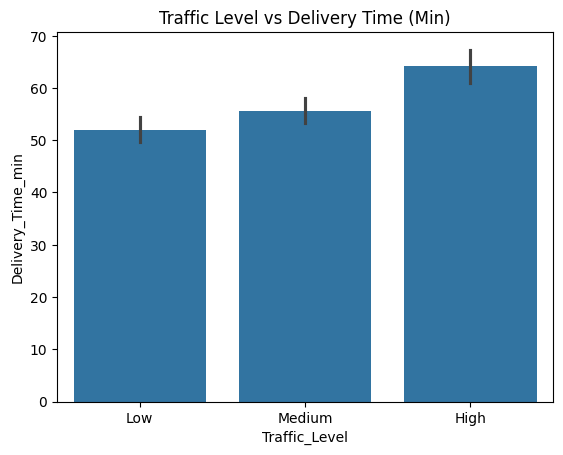

In [22]:
# Traffic Level against Delivery Time
sns.barplot(data=df, x='Traffic_Level', y='Delivery_Time_min')
plt.title('Traffic Level vs Delivery Time (Min)')

This barploy shows how increased traffic levels lead to greater delivery times. As expected, traffic levels seem to inhibit deliver drivers as they increase in severity.

Text(0.5, 1.0, 'Time of Day vs Delivery Time (Min)')

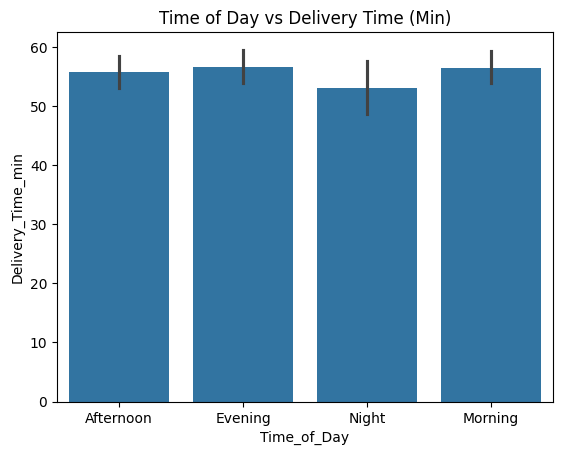

In [23]:
# Time of Day against Delivery Time
sns.barplot(data=df, x='Time_of_Day', y='Delivery_Time_min')
plt.title('Time of Day vs Delivery Time (Min)')

This barplot compares the delivery time to the time of day. Largely, it doesn't seem that there is any large variation in delivery time between the times of day. However, the one exception is that it appears delivery times are slightly shorter on average at night.

Text(0.5, 1.0, 'Vehicle Type vs Delivery Time (Min)')

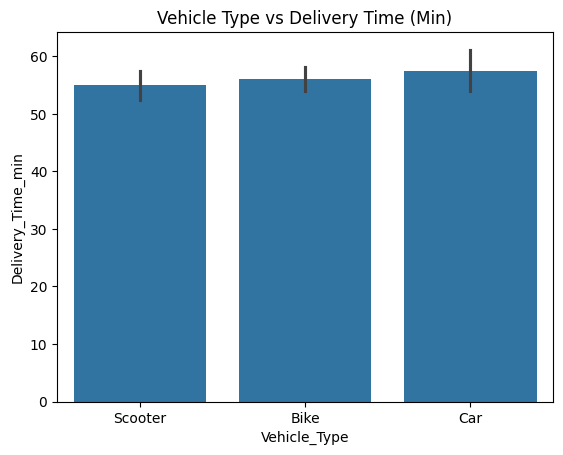

In [24]:
# Vehicle Type against Delivery Time
sns.barplot(data=df, x='Vehicle_Type', y='Delivery_Time_min')
plt.title('Vehicle Type vs Delivery Time (Min)')

This barplot compares vehicle types to delivery times. It showscases very little variation between vehicle types but shows a slight correlation. On average, scooters take the least amount of time, followed by bikes and then cars.

Text(0.5, 1.0, 'Preparation Time vs Delivery Time (Min)')

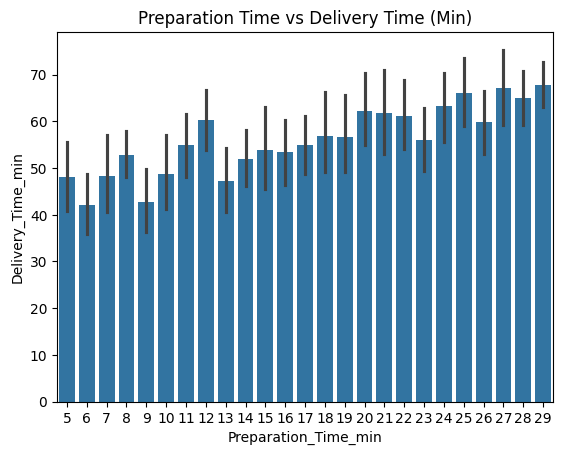

In [25]:
# Preparation Time against Delivery Time
sns.barplot(data=df, x='Preparation_Time_min', y='Delivery_Time_min')
plt.title('Preparation Time vs Delivery Time (Min)')

This barplot compares preparation time to delivery time. Preparation time seems to correlate positively with delivery time. As preparation time increases, the delivery time similarly increases. Although this appears to level out for shorter preparation times.

Text(0.5, 1.0, 'Courier Years of Experience vs Delivery Time (Min)')

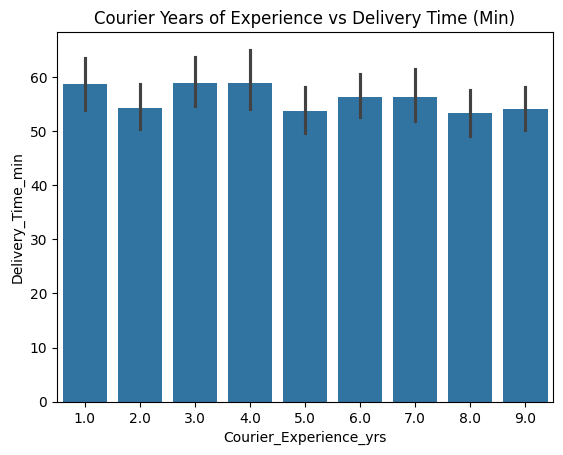

In [26]:
# Courier Years of Experience (Years) against Delivery Time
sns.barplot(data=df, x='Courier_Experience_yrs', y='Delivery_Time_min')
plt.title('Courier Years of Experience vs Delivery Time (Min)')

This barploy compares courier experience to delivery time. One might conceive that a more experiecned courier may deliver food faster, however we can see that there is no apparent correlation. Some categories of note are couriers with one year of experience who seem to take a longer time as one might expect, and years 8 and 9 which seem to have relatively short delivery times. However, delivery time for couriers of all experience levels seem to vary wildly with no identifiable pattern.

## Modeling and Interpretations

To predict the delivery time, I intend to use several different regression models to see which one performs the best. In each of these models I will train them on 80% of my data and test on the remaining 20%, this will give me enough training data to develop and accurate while keeping a large enough test space to raise my confidence in making a determination as to whether or not the model is accurate.

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

### Baseline Model

I will compare each of my models to a baseline using the mean squared error (MSE) of each model compared with that of the MSE of the mean delivery time.

In [28]:
y = df['Delivery_Time_min']
baseline_preds = np.ones(len(y)) * y.mean()
mean_squared_error(y, baseline_preds)

475.5746

### Multiple Regression Model

Since it is likely that delivery times are influenced by multiple factors, I intend to use a multiple regression model in order to use these multiple independent variables in order to predict the dependent variable. This model will enable me to consider the combined effect of all other vraibles on the delivery time.

In [29]:
X = df[['Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs']]
y = df['Delivery_Time_min']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [30]:
cat_col = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = 'passthrough')

In [31]:
pipe = Pipeline([('encode', transformer), ('model', LinearRegression())])
pipe.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Weather', 'Traffic_Level',
                                                   'Time_of_Day',
                                                   'Vehicle_Type'])])),
                ('model', LinearRegression())])

In [32]:
lr = pipe.named_steps['model']
coefficients = lr.coef_
names = transformer.get_feature_names_out()
pd.DataFrame(coefficients, names)

,0
onehotencoder__Weather_Foggy,6.755000
onehotencoder__Weather_Rainy,5.646934
onehotencoder__Weather_Snowy,9.541717
onehotencoder__Weather_Windy,2.281212
onehotencoder__Traffic_Level_Low,-11.839544
onehotencoder__Traffic_Level_Medium,-6.134862
onehotencoder__Time_of_Day_Evening,0.191056
onehotencoder__Time_of_Day_Morning,-0.866881
onehotencoder__Time_of_Day_Night,-2.184997
onehotencoder__Vehicle_Type_Car,0.060277


In [33]:
#find y-int
float(lr.intercept_)

18.196021134922617

In [34]:
#calculate mse for training data
y_train_preds = pipe.predict(X_train)
mean_squared_error(y_train, y_train_preds)

105.19260109639978

In [35]:
#calculate mse for testing data
y_test_preds = pipe.predict(X_test)
mean_squared_error(y_test, y_test_preds)

97.31516253393156

In [36]:
#determine feature importance
r = permutation_importance(pipe, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
Distance_km,1.297524
Weather,0.064589
Traffic_Level,0.123085
Time_of_Day,-0.000162
Vehicle_Type,0.002048
Preparation_Time_min,0.253057
Courier_Experience_yrs,0.011743


My multiple regression model performed vastly better when compared to my baseline. However, the test data actually performed even better than the training data. This could be because the test data has a different distribution then the training data and could fit the model better. Since the difference in the MSE is small, the introduction of this difference in distribution could be because of random variation in the test-training data split. Ultimately, there is no question that the Multiple Regression Model performs far better than the baseline model.

For this model Distance was the most important predictor by far. It was followed in order by Preparation Time, Traffic Level, Weather, Courier Experience, Vehicle Type, and Time of Day.

### Decision Tree Regression Model

In order to test whether a regression model that captures non-linear relationships, I chose to use the Decision Tree Regression Model. Largely for the most important predictor (Distance) in the Multiple Regression Model, the relationship was linear. However, for some of the other variables the relationship is not as clear which makes me wonder if a model better suited to these types of relationships might perform better overall.  

In [37]:
X = df[['Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs']]
y = df['Delivery_Time_min']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [38]:
cat_col = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
ohe = OneHotEncoder(sparse_output = False)
encoder = make_column_transformer((ohe, cat_col), verbose_feature_names_out = False, remainder = 'passthrough')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

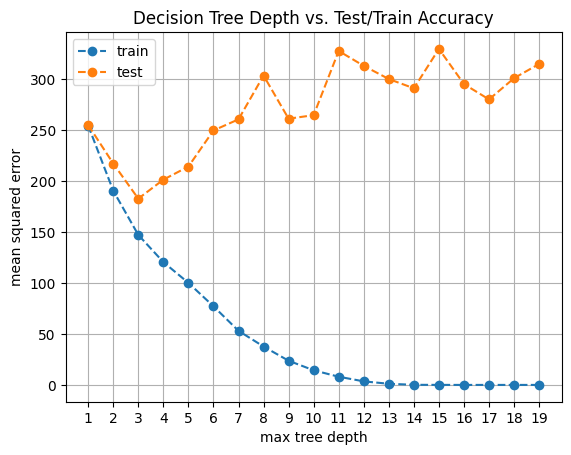

In [39]:
train_scores = []
test_scores = []
for d in range(1, 20):
    dtree = DecisionTreeRegressor(max_depth = d).fit(X_train_encoded, y_train)
    y_train_preds = dtree.predict(X_train_encoded)
    y_test_preds = dtree.predict(X_test_encoded)
    train_scores.append(mean_squared_error(y_train, y_train_preds))
    test_scores.append(mean_squared_error(y_test, y_test_preds))

plt.plot(range(1, 20), train_scores, '--o', label = 'train')
plt.plot(range(1, 20), test_scores, '--o', label = 'test')
plt.grid()
plt.legend()
plt.xticks(range(1, 20))
plt.xlabel('max tree depth')
plt.ylabel('mean squared error')
plt.title('Decision Tree Depth vs. Test/Train Accuracy');

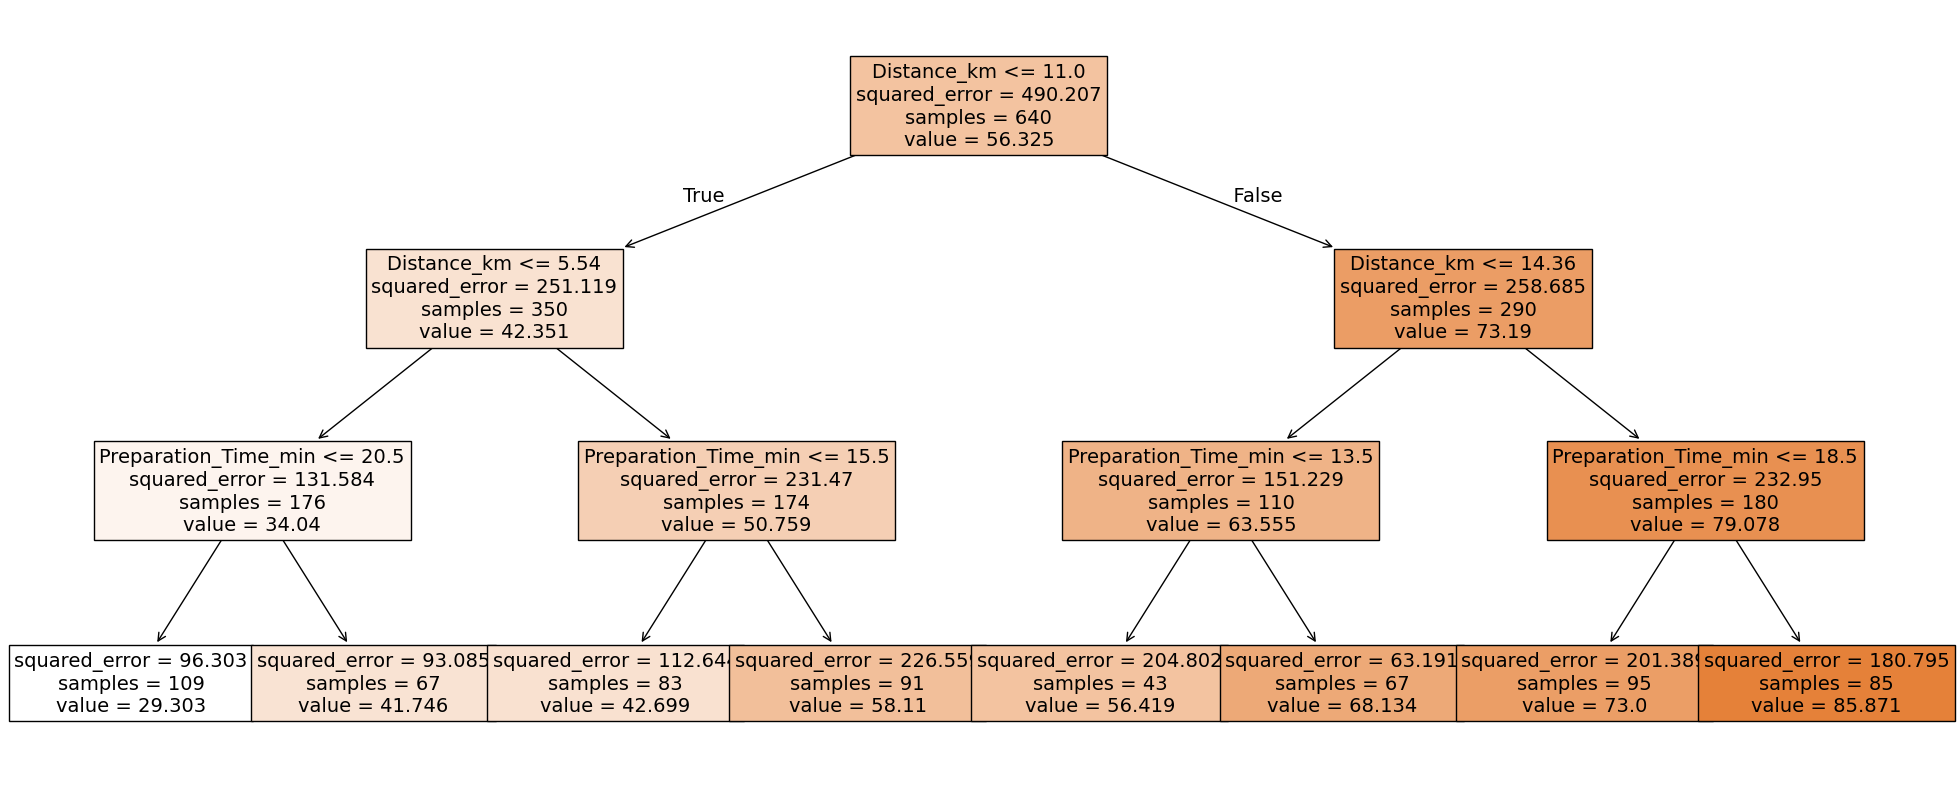

In [40]:
dtree = DecisionTreeRegressor(max_depth = 3).fit(X_train_encoded, y_train)
plt.figure(figsize=(25, 10))
plot_tree(dtree, filled=True, feature_names=encoder.get_feature_names_out().tolist(), fontsize=14);

In [41]:
y_train_preds = dtree.predict(X_train_encoded)
mean_squared_error(y_train, y_train_preds)

147.24984273677921

In [42]:
y_test_preds = dtree.predict(X_test_encoded)
mean_squared_error(y_test, y_test_preds)

182.84308483407398

In [43]:
r = permutation_importance(dtree, X_test_encoded, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = encoder.get_feature_names_out().tolist())

,0
Weather_Clear,0.000000
Weather_Foggy,0.000000
Weather_Rainy,0.000000
Weather_Snowy,0.000000
Weather_Windy,0.000000
Traffic_Level_High,0.000000
Traffic_Level_Low,0.000000
Traffic_Level_Medium,0.000000
Time_of_Day_Afternoon,0.000000
Time_of_Day_Evening,0.000000


The graph of the decision tree depth against MSE, told me that the depth would be relatively low at a max depth of 3. As a result, the model gave preference only to two variables in predicting delivery times. This resulted in an MSE on the training data that was much higher than that of the multiple regression model. The MSE on the test data was even higher, although both of these values were much less then my baseline MSE. This tells us that while it did perform worse than the Multiple Regression Model, it still outperforms the baseline by quite a bit.

The Distance was again by far the most important precictor while Preparation Time trailed behind. The other variables were not even considered due to the low depth in the decision tree.

### Random Forest Regression Model

I decided that it makes sense to extend the Decision Tree Regression Model into a Random Forest Regression Model to see if it can perform any closer to how the Multiple Regression Model performed. I still want to see if it can capture some of the non-linear relationships of the less impactful variables. Because the Decision Tree Regression Model performed well relative to the baseline model, I want to see if the Random Forest Regression Model can potentially outperform the Multiple Regression Model.

In [44]:
X = df[['Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs']]
y = df['Delivery_Time_min']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [45]:
cat_col = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = 'passthrough')
pipe = Pipeline([('encode', transformer), ('model', RandomForestRegressor())])
param_grid = {'model__n_estimators': [50, 100, 150, 200],'model__max_depth': [3, 4, 5, 6, 10]}
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['Weather',
                                                                          'Traffic_Level',
                                                                          'Time_of_Day',
                                                                          'Vehicle_Type'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [3, 4, 5, 6, 10],
                         'model__n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [46]:
grid_search.best_params_

{'model__max_depth': 6, 'model__n_estimators': 200}

In [47]:
forest = grid_search.best_estimator_
y_train_preds = forest.predict(X_train)
mean_squared_error(y_train, y_train_preds)

61.69887396530212

In [48]:
y_test_preds = forest.predict(X_test)
mean_squared_error(y_test, y_test_preds)

148.8973284506191

In [49]:
r = permutation_importance(forest, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
Distance_km,1.242722
Weather,0.013538
Traffic_Level,0.033538
Time_of_Day,-0.003211
Vehicle_Type,-0.000190
Preparation_Time_min,0.209637
Courier_Experience_yrs,-0.000846


As we can see with the random forest regression model, it did perform extremely well on the training data, however, the model did much worse on the test data. We can see that the training data was very well fit to the training data but begins to falter when compared to the multiple regression model as it is introduced to new data. The model does seem to perform better overall when compared with the Decision Tree Regression model, this can probably be attributed to its ability to look at the combined effect of all variables.

Still, the Distance seems to be the most important predictor followed in order by Preparation time, Traffic Level, Weather, Vehicle Type, Courier Experience and Time of Day.

### Gradient Boosting Regression Model

Finally, I wanted to switch it up a little bit by extending my modeling approach to use a Gradient Boosting Regression model because it builds on the strengths of decision trees while offering more control over bias and variance. Given that both the Decision Tree and Random Forest models performed well, I wanted to explore whether Gradient Boosting could further improve predictive performance by sequentially correcting the errors of previous trees. This model is particularly appealing for my dataset because it can capture non-linear interactions between features like Time Of Day and Courier Experience factors that likely influence delivery time in subtle ways.

In [50]:
X = df[['Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs']]
y = df['Delivery_Time_min']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [51]:
cat_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
transformer = make_column_transformer((OneHotEncoder(drop='first', sparse_output=False), cat_cols), remainder='passthrough')

In [52]:
gbr_pipe = Pipeline([('encode', transformer), ('model', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=20))])
gbr_pipe.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Weather', 'Traffic_Level',
                                                   'Time_of_Day',
                                                   'Vehicle_Type'])])),
                ('model',
                 GradientBoostingRegressor(max_depth=5, random_state=20))])

In [53]:
y_train_preds = gbr_pipe.predict(X_train)
mean_squared_error(y_train, y_train_preds)

12.225322414276718

In [54]:
y_test_preds = gbr_pipe.predict(X_test)
mean_squared_error(y_test, y_test_preds)

166.32257881853192

In [55]:
r = permutation_importance(gbr_pipe, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
Distance_km,1.245946
Weather,0.021954
Traffic_Level,0.090384
Time_of_Day,-0.006934
Vehicle_Type,0.000169
Preparation_Time_min,0.209916
Courier_Experience_yrs,0.007114


Remarkably, the model performed incredibly well on the training data set but much worse on the test data set. This tells us that the gradient boosing regression model tailored extremely well to the data it was trained on, but did not generalize well to new data. Overall, it performed much better than the baseline model, however, the high MSE against the test data does raise some concerns about it's ability to accurately predict delivery times.

The predictor importance of each variable in this model followed a realtively similar pattern to some of the earlier models with Distance being the most important predictor followed in order by Preparation Time, Traffic Level, Weather, Courier Experience, Vehicle Type, and Time of Day.

## Next Steps & Discussion

### Summary of Findings

### Next Steps/Improvements

Through analyzing food delivery times for orders on food delivery apps, I was able to construct several predictive models which significantly improved performance over a baseline predictive model. This demonstrates that they can be used in order to predict delivery times on food deliver app orders with a relative accuracy that will serve to enhance the experience of both external and internal stakeholders.

The Multiple Regression Model performed the best, followed in order by the random forest regression model, the decision tree regresion model, and finally the Gradient Boosting Regression Model.

Key Findings:

1. The Multiple Regression Model performed the best overall indicating a relativel simple relationship between the independent and dependent variables. Indeed, when Delivery Time was compared with many of the other variables they seemed to have linearly correlated relationships.

2. The most important predictor by far for predicting Delivery Time was the Distance of the delivery with food preparation time following behind. Following behind was Traffic Level. This shows that longer distances will almost always lead to longer delivery times with influence to a much smaller extent from environmental factors.

3. Many metrics which one might think had some relevance on delivery time did not appear to have very strong influence in many of the models. For example, weather patterns and time of day had minimal impact contrary to what one might think.

All in all, the multiple regression model proved to best predict delivery times, illustrating the relative linear nature of the data. It demonstrated that at the end of the day, the distance of the delivery is the biggest predictor of a delivery time and other metrics play a smaller role in determining the delivery times.

### Next Steps & Improvements

These findings show that in order to determine the effects of other environmental factors on delivery time one may need to collect the data with greater granularity in the data values or find more objective data collection methods.

To further enhance the predictive capabilities of my model I would like to do the following:



*   Greater granularity in the data values for time of day

I believe that this would lead to better data which could correlate with different traffic patterns throughout the day. By limiting the time of day to such broad categories it makes it hard for a model to predict based on the exact time that a customer may order food.

*  Added data around courier rating

I think it could be valuable to include courier ratings, we saw very little correlation between courier years of experience and delivery time, however, I believe that customer satisfaction ratings with couriers could further enhance the model since one of the biggest factors in customer satisfaction as it pertains to food delivery is the delivery time.

* Application name

Tailoring the model for each of the several delivery service applications that exist would help customers determine if there is any patterns in delivery time with respect to the application itself which might merit further investigation. This could potentially provide information for potential investors about the future success of the application.

* Location data

Using location data would enable the development of location tailored predicitive models, this could prove extremey important to variations in delivery time for similar distances in different cities. Due to the unique topologies of environments that support delivery apps, I believe that adding location data could provide a new level of accuracy which would far surpass the current models.

By using finer granularity more patterns may emerge that could necesitate the usage of different models if for example a non-linear correlation emerged from using exact times as opposed to broad categories of time. With all of these enhancements I believe I could build an even better predictive model which would provide customers and internal stakeholders alike better insights into defining realistic expectations around delivery times.